In [ ]:
import time
import numpy as np
from scipy.sparse.linalg.eigen.arpack import eigsh


def normalized_laplacian(adj_matrix):
    nodes_degree = np.sum(adj_matrix, axis=1)
    nodes_degree_sqrt = 1/np.sqrt(nodes_degree)
    degree_matrix = np.diag(nodes_degree_sqrt)
    eye_matrix = np.eye(adj_matrix.shape[0])
    return eye_matrix - degree_matrix * adj_matrix * degree_matrix


def unnormalized_laplacian(adj_matrix):
    nodes_degree = np.sum(adj_matrix, axis=1)
    degree_matrix = np.diag(nodes_degree)
    return degree_matrix - adj_matrix


def VNGE_exact(adj_matrix):
    #start = time.time()
    nodes_degree = np.sum(adj_matrix, axis=1)
    c = 1.0 / np.sum(nodes_degree)
    laplacian_matrix = c * unnormalized_laplacian(adj_matrix)
    eigenvalues, _ = np.linalg.eig(laplacian_matrix)
    eigenvalues[eigenvalues < 0] = 0
    pos = eigenvalues > 0
    H_vn = - np.sum(eigenvalues[pos] * np.log2(eigenvalues[pos]))
    return H_vn
    #print('Time:', time.time() - start)


def VNGE_FINGER(adj_matrix):
    #start = time.time()
    nodes_degree = np.sum(adj_matrix, axis=1)
    c = 1.0 / np.sum(nodes_degree)
    edge_weights = 1.0 * adj_matrix[np.nonzero(adj_matrix)]
    approx = 1.0 - np.square(c) * (np.sum(np.square(nodes_degree)) + np.sum(np.square(edge_weights)))
    laplacian_matrix = unnormalized_laplacian(adj_matrix)
    '''
    eigenvalues, _ = np.linalg.eig(laplacian_matrix)  # the biggest reduction
    eig_max = c * max(eigenvalues)
    '''
    eig_max, _ = eigsh(laplacian_matrix, 1, which='LM')
    eig_max = eig_max[0] * c
    H_vn = - approx * np.log2(eig_max)
    print('H_vn approx:', H_vn)
    #print('Time:', time.time() - start)


# nodes_num = 3000
# sparsity = 0.01


# tmp_m = np.random.uniform(0, 1, (nodes_num, nodes_num))
# pos1 = tmp_m > sparsity
# pos2 = tmp_m <= sparsity
# tmp_m[pos1] = 0
# tmp_m[pos2] = 1
# tmp_m = np.triu(tmp_m)
# adj_m = tmp_m + np.transpose(tmp_m)

# VNGE_exact(adj_m)
# VNGE_FINGER(adj_m)

In [ ]:

def entropy_(ResultsRow):
    s = Skeleton((data['Patches'][3][0]).astype(float))
    ske = s.graph
    result = VNGE_exact(nx.to_numpy_array(nx.from_scipy_sparse_matrix(nx.adjacency_matrix(nx.from_scipy_sparse_matrix(ske)))))
    r = np.sqrt(np.real(result)**2 + np.imag(result)**2)
    return r

r_ = []
i = 0
for index,row in data.iterrows():
    r_ += [entropy_(row)]
    i=i+1
    print(i)

In [22]:
VNGE_exact(nx.adjacency_matrix(nx.from_scipy_sparse_matrix(ske)))

H_vn exact: (3.336393657876325-7.703719777548943e-34j)
Time: 0.805262565612793


In [8]:
algorithms.graph_entropy(nx.from_scipy_sparse_matrix(ske))

In [11]:
algorithms.graph_entropy(ske)

AttributeError: is_directed not found

In [9]:
A = nx.to_numpy_array(nx.from_scipy_sparse_matrix(ske))
import networkqit as nq
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
beta_range = np.logspace(-3,3,200)
Sbeta = nq.batch_compute_vonneumann_entropy(L=nq.graph_Laplacian(A),beta_range=beta_range)
plt.semilogx(beta_range, Sbeta)
plt.xlabel('$\\beta$')
plt.ylabel('$S$')
plt.title('Unnormalized spectral entropy')
plt.show()

ImportError: cannot import name 'logsumexp' from 'autograd.scipy.misc' (C:\Users\diogo\anaconda3\envs\Cytoskeleton\lib\site-packages\autograd\scipy\misc.py)

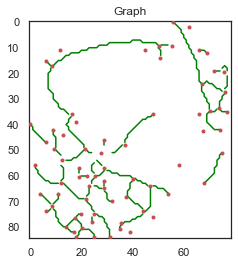

In [349]:
graph = sknw.build_sknw(data['Patches'][5][0])

# draw image
fig,ax = plt.subplots()
plt.imshow(np.zeros_like(data['Patches'][5][0]), cmap='gray_r')
ax.set(facecolor = "white")

# draw edges by pts
for (s,e) in graph.edges():
    ps = graph[s][e]['pts']
    plt.plot(ps[:,1], ps[:,0], 'green',zorder=10)
    
# draw node by o
nodes = graph.nodes()
ps = np.array([nodes[i]['o'] for i in nodes])
plt.plot(ps[:,1], ps[:,0], 'r.',zorder=10)

# title and show
plt.title('Graph')
plt.show()

In [364]:
#L = nx.normalized_laplacian_matrix(graph)
#e = np.linalg.eigvals(L.A)

pixel_graph.density()

AttributeError: density not found

In [14]:
pixel_graph

<498x498 sparse matrix of type '<class 'numpy.float64'>'
	with 972 stored elements in Compressed Sparse Row format>

nx_pylab.py (402): Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working


AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'

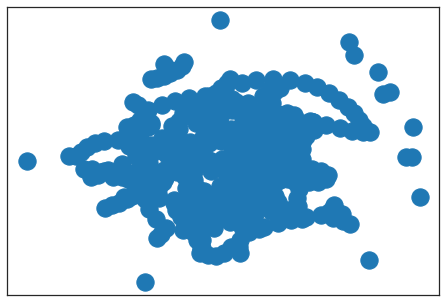

In [12]:
from skan import skeleton_to_csgraph
pixel_graph, coordinates = skeleton_to_csgraph(data['Patches'][5][0])

G = nx.from_scipy_sparse_matrix(pixel_graph)
nx.draw(G)
plt.draw()

In [322]:
G = nx.from_scipy_sparse_array(ske)
#fig,ax = plt.subplots()
#ax.imshow(np.zeros_like(data['Patches'][0][0]))
nx.draw_networkx(G)
plt.draw()

AttributeError: module 'networkx' has no attribute 'from_scipy_sparse_array'

In [386]:
[nx.wiener_index(el[0]) for el in data['Patches']]

AttributeError: 'numpy.ndarray' object has no attribute 'is_directed'

In [393]:
np.histogram(summarize(Skeleton((data['Patches'][0][0]).astype(float)))['branch-distance'],bins=200)

(array([16, 11,  0, 10,  0, 18,  5,  5, 12,  0, 15,  3,  7,  8,  2,  8,  2,
         5,  4,  0,  2,  1,  3,  5,  0,  0,  5,  5,  0,  1,  1,  1,  1,  0,
         2,  0,  1,  0,  2,  1,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1], dtype=int64),
 array([ 1.        ,  1.27834524,  1.55669048,  1.83503571,  2.11338095,
         2.39172

In [417]:
np.log2(summarize(Skeleton((data['Patches'][36][0]).astype(float))).loc[np.where(summarize(Skeleton((data['Patches'][0][0]).astype(float)))['branch-distance'] > 1)[0]]['branch-distance'] / summarize(Skeleton((data['Patches'][0][0]).astype(float))).loc[np.where(summarize(Skeleton((data['Patches'][0][0]).astype(float)))['branch-distance'] > 1)[0]]['euclidean-distance'])

0      2.104220
1      0.351789
2      0.936752
3      0.129397
4     -0.850220
         ...   
175    0.610589
176    2.413710
177   -1.745927
178    1.229330
179    0.734841
Length: 164, dtype: float64

In [395]:
list(filter(lambda dist: dist > 1, summarize(Skeleton((data['Patches'][0][0]).astype(float)))['branch-distance'] ))

[4.414213562373095,
 4.242640687119286,
 2.0,
 7.0,
 3.82842712474619,
 4.242640687119286,
 4.82842712474619,
 8.242640687119286,
 3.82842712474619,
 6.242640687119285,
 14.485281374238571,
 34.89949493661166,
 2.414213562373095,
 23.242640687119287,
 2.414213562373095,
 2.414213562373095,
 3.8284271247461903,
 42.89949493661166,
 3.8284271247461903,
 4.82842712474619,
 7.65685424949238,
 2.414213562373095,
 3.8284271247461903,
 2.414213562373095,
 4.414213562373095,
 16.071067811865476,
 22.798989873223338,
 3.0,
 4.0,
 3.8284271247461903,
 3.414213562373095,
 11.656854249492381,
 6.242640687119286,
 5.414213562373095,
 2.0,
 3.414213562373095,
 3.414213562373095,
 3.8284271247461903,
 5.414213562373095,
 8.65685424949238,
 8.414213562373096,
 7.242640687119285,
 2.414213562373095,
 11.65685424949238,
 1.4142135623730951,
 7.414213562373095,
 36.627416997969526,
 4.82842712474619,
 5.414213562373095,
 8.242640687119284,
 10.071067811865476,
 12.414213562373096,
 6.0,
 1.41421356237309

In [414]:
np.unique(summarize(Skeleton((data['Patches'][36][0]).astype(float)))['branch-distance'] / summarize(Skeleton((data['Patches'][36][0]).astype(float)))['euclidean-distance'])

array([1.        , 1.        , 1.02533823, 1.03339434, 1.03962597,
       1.03962597, 1.04852814, 1.04852814, 1.05449021, 1.05796668,
       1.06181464, 1.06181464, 1.0660426 , 1.06753105, 1.07060405,
       1.07060405, 1.07124475, 1.07375062, 1.07531716, 1.07684968,
       1.07684968, 1.07684968, 1.07781746, 1.07966913, 1.07966913,
       1.08089048, 1.08153897, 1.08176927, 1.08231175, 1.08231175,
       1.08284271, 1.09296358, 1.09503162, 1.10355339, 1.10839661,
       1.12745033, 1.12962429, 1.1302493 , 1.13111044, 1.13111044,
       1.13221377, 1.13807119, 1.13850053, 1.1430486 , 1.14589774,
       1.14640848, 1.14863845, 1.15589814, 1.15922927, 1.16568542,
       1.16568542, 1.16853858, 1.17106559, 1.18339888, 1.18639077,
       1.18911038, 1.19065669, 1.19117549, 1.20710678, 1.21065496,
       1.21545846, 1.2194356 , 1.22426407, 1.22428256, 1.24210263,
       1.26048902, 1.26957434, 1.27614237, 1.27614237, 1.2894681 ,
       1.33462954, 1.33916474, 1.41421356, 1.81795903, 2.41421

In [428]:
summarize(Skeleton((data['Patches'][34][0]).astype(float)))

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,image-coord-dst-1,coord-src-0,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance
0,1,1,9,4.414214,1,1.0,2.107342e-08,0.0,43.0,4.0,42.0,0.0,43.0,4.0,42.0,4.123106
1,1,3,8,2.828427,1,1.0,0.000000e+00,2.0,39.0,4.0,41.0,2.0,39.0,4.0,41.0,2.828427
2,1,8,31,6.414214,2,1.0,1.490116e-08,4.0,41.0,10.0,40.0,4.0,41.0,10.0,40.0,6.082763
3,1,9,15,4.414214,1,1.0,0.000000e+00,4.0,42.0,6.0,45.0,4.0,42.0,6.0,45.0,3.605551
4,4,19,32,2.414214,1,1.0,0.000000e+00,8.0,54.0,10.0,55.0,8.0,54.0,10.0,55.0,2.236068
5,1,31,52,13.828427,2,1.0,0.000000e+00,10.0,40.0,13.0,28.0,10.0,40.0,13.0,28.0,12.369317
6,1,31,49,2.414214,1,1.0,0.000000e+00,10.0,40.0,12.0,39.0,10.0,40.0,12.0,39.0,2.236068
7,4,32,34,2.000000,2,1.0,0.000000e+00,10.0,55.0,10.0,57.0,10.0,55.0,10.0,57.0,2.000000
8,4,32,50,2.414214,1,1.0,0.000000e+00,10.0,55.0,12.0,54.0,10.0,55.0,12.0,54.0,2.236068
9,4,34,34,3.414214,3,1.0,0.000000e+00,10.0,57.0,10.0,57.0,10.0,57.0,10.0,57.0,0.000000


In [432]:
np.ma.masked_invalid(summarize(Skeleton((data['Patches'][34][0]).astype(float)))['branch-distance'] / summarize(Skeleton((data['Patches'][34][0]).astype(float)))['euclidean-distance']).data

array([1.07060405, 1.        , 1.05449021, 1.22428256, 1.07966913,
       1.11796207, 1.07966913, 1.        , 1.07966913,        inf,
       1.07531716, 1.06753105, 1.20710678, 1.08231175, 1.06903559,
       1.07966913, 1.07966913, 1.        , 1.08284271, 1.        ,
       1.07966913, 1.0660426 , 1.        , 1.07966913, 1.        ,
       1.24863832, 1.07966913, 1.        , 1.        , 1.08231175,
       1.        , 1.08089048, 1.06181464, 1.10804694, 1.27152714,
       1.07060405, 1.        , 1.        , 1.        , 1.1561986 ,
       1.07060405, 1.07966913, 1.07966913, 1.03339434, 1.        ,
       1.07966913, 1.27614237, 1.06181464])

In [427]:
summarize(Skeleton((data['Patches'][34][0]).astype(float)))['branch-distance'] / summarize(Skeleton((data['Patches'][34][0]).astype(float)))['euclidean-distance']

0     1.070604
1     1.000000
2     1.054490
3     1.224283
4     1.079669
5     1.117962
6     1.079669
7     1.000000
8     1.079669
9          inf
10    1.075317
11    1.067531
12    1.207107
13    1.082312
14    1.069036
15    1.079669
16    1.079669
17    1.000000
18    1.082843
19    1.000000
20    1.079669
21    1.066043
22    1.000000
23    1.079669
24    1.000000
25    1.248638
26    1.079669
27    1.000000
28    1.000000
29    1.082312
30    1.000000
31    1.080890
32    1.061815
33    1.108047
34    1.271527
35    1.070604
36    1.000000
37    1.000000
38    1.000000
39    1.156199
40    1.070604
41    1.079669
42    1.079669
43    1.033394
44    1.000000
45    1.079669
46    1.276142
47    1.061815
dtype: float64

In [425]:
b = [np.mean(summarize(Skeleton((el[0]).astype(float)))['branch-distance'] / summarize(Skeleton((el[0]).astype(float)))['euclidean-distance']) for el in data['Patches']]
list(zip(range(len(b)),b))

[(0, 1.0973282616900821),
 (1, 1.0967642185597475),
 (2, 1.0968481846893885),
 (3, 1.0872781789761612),
 (4, 1.0839233133302817),
 (5, 1.0890124015266824),
 (6, 1.073530408776904),
 (7, 1.098771612918019),
 (8, 1.083621542040222),
 (9, 1.0983338723943983),
 (10, 1.0712319299243567),
 (11, 1.1027732521641342),
 (12, 1.0910075724850847),
 (13, 1.098552894317317),
 (14, 1.0738477401172566),
 (15, 1.0857966076392211),
 (16, 1.0963678110964865),
 (17, 1.1059025389816624),
 (18, 1.0983707253290493),
 (19, 1.127592888162993),
 (20, 1.1309680017656945),
 (21, 1.122765596551709),
 (22, 1.0686782044020333),
 (23, 1.0852316394910955),
 (24, 1.0827519223583775),
 (25, 1.0892574934336652),
 (26, 1.0817658437753792),
 (27, 1.1173112173229243),
 (28, 1.1059074101322035),
 (29, 1.1321277757048136),
 (30, 1.1295900852693102),
 (31, 1.112850780875941),
 (32, 1.0939377214387596),
 (33, 1.094424892876876),
 (34, inf),
 (35, 1.097505886340244),
 (36, 1.092844982145789),
 (37, 1.0701999204456245),
 (38, 1.0

In [411]:
[np.mean(np.log2(summarize(Skeleton((el[0]).astype(float))).loc[np.where(summarize(Skeleton((el[0]).astype(float)))['branch-distance'] > 1)[0]]['branch-distance'] / summarize(Skeleton((el[0]).astype(float))).loc[np.where(summarize(Skeleton((el[0]).astype(float)))['branch-distance'] > 1)[0]]['euclidean-distance'])) for el in data['Patches']]


[0.12782348264998322,
 0.12264515356785248,
 0.1264619090340303,
 0.113288251394246,
 0.11295718740711373,
 0.11703917792859315,
 0.1056346724753602,
 0.12899409897139844,
 0.1128150918336715,
 0.12996958710328102,
 0.09884819779547425,
 0.13237020664223312,
 0.1202958659991488,
 0.12280204705378236,
 0.09931542384003607,
 0.11419170548451957,
 0.1253189763232325,
 0.13116848046859264,
 0.12243357892348526,
 0.14830113933546318,
 0.15287043593285227,
 0.14625853368056047,
 0.09858186155567093,
 0.11470295485727419,
 0.10631118607628452,
 0.1163929947493058,
 0.10829252298062635,
 0.14788197875025375,
 0.1351989097592711,
 0.15484940932211,
 0.16206452849717126,
 0.14183036832975207,
 0.12529689628342414,
 0.12189287697818356,
 inf,
 0.13504575706135258,
 0.12513239578779906,
 0.10387541448402739,
 0.10984268288072795,
 0.12394920538264598,
 0.08849799137559787,
 0.11725568574929023,
 0.14950598983865898,
 0.12760855515348618,
 0.13192230847005668,
 0.11232011204670415,
 0.1058328838411

In [19]:
np.array([((line[0][0] + line[1][0])/2,(line[0][1] + line[1][1])/2) for line in data['Lines'][0]])

array([[845.057 , 130.4215],
       [898.1295, 327.391 ],
       [821.3115, 186.7815],
       [892.818 , 310.5465],
       [809.5795, 204.819 ],
       [812.9705, 136.305 ],
       [828.079 , 211.2465],
       [827.5895, 187.0965],
       [839.3325,  24.9585],
       [839.395 , 221.538 ],
       [825.165 , 205.931 ],
       [841.047 , 115.37  ],
       [818.6665, 184.5115],
       [901.3425, 324.962 ],
       [827.313 , 123.547 ],
       [802.847 , 146.432 ],
       [816.588 , 131.1935],
       [837.0705,  14.438 ],
       [823.003 , 161.126 ],
       [837.7055, 220.738 ],
       [835.142 , 230.9065],
       [793.9165, 178.239 ],
       [817.908 , 214.695 ],
       [833.154 ,  18.75  ],
       [835.7795,  66.942 ],
       [844.194 , 114.6115],
       [789.211 , 180.653 ],
       [803.013 , 195.629 ],
       [900.7625, 327.7465],
       [822.4085, 157.017 ],
       [826.4575, 152.5905],
       [897.1105, 316.21  ],
       [818.529 , 178.1625],
       [828.4945, 155.069 ],
       [838.87

In [481]:
np.mean(nx.normalized_laplacian_spectrum(sknw.build_sknw(data['Patches'][0][0])))
#nx.max_weight_clique(sknw.build_sknw(data['Patches'][0][0]))

laplacianmatrix.py (128): scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
laplacianmatrix.py (129): scipy.isinf is deprecated and will be removed in SciPy 2.0.0, use numpy.isinf instead


0.8640806577998986

In [29]:

median_points = [((line[0][0] + line[1][0])/2,(line[0][1] + line[1][1])/2) for line in data['Lines'][0]]
print(np.array(median_points[0]))
print(np.array((20,40)))

[845.057  130.4215]
[20 40]


In [22]:
[np.linalg.norm(np.array(m)-np.array((20,40))) for m in [((line[0][0] + line[1][0])/2,(line[0][1] + line[1][1])/2) for line in data['Lines'][0]]]

[829.9970487364699,
 923.9615823459599,
 814.644050352361,
 913.7869936622265,
 806.5984686206949,
 798.797137510676,
 826.0248386115577,
 820.8764711103005,
 819.4705560778251,
 839.2640892287719,
 822.0850162762973,
 824.4991286284056,
 811.6352332510585,
 926.2655902872835,
 811.6245321440203,
 790.0488567379869,
 801.7909304714353,
 817.4702550027432,
 812.0870186654876,
 837.4416453546181,
 837.1987648738202,
 786.1658667820996,
 816.8081289317582,
 813.4316137303738,
 816.2242730918077,
 827.5642727717587,
 781.964723584127,
 798.3293454521136,
 926.5746757107601,
 810.8960347425865,
 814.2790185166875,
 919.5731582154027,
 810.3933861077902,
 816.6420459976636,
 819.2350976461214,
 810.2060156469465,
 816.6568165579101,
 806.1316565626859,
 820.7351055256805,
 802.4541393032999,
 805.7459177571116,
 814.3100740112761,
 824.9814839020632,
 817.0367312018474,
 824.0521523503534,
 853.7319084542875,
 816.8836910241566,
 857.1227728641038,
 817.9276982936817,
 820.99060603837,
 824.